In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("bollywood.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'bollywood.csv'

# 1.How many records are present in the dataset?

In [ ]:
m = df["SlNo"].max()
m

In [9]:
df.Genre.unique()

NameError: name 'df' is not defined

In [10]:
for i in range(m):
    if(df.Genre[i] == 'Action '):
        df.Genre[i] = 'Action'
    elif(df.Genre[i] == ' Drama '):
        df.Genre[i] = 'Drama'
    elif(df.Genre[i] == 'Thriller '):
        df.Genre[i] = 'Thriller'

df.Genre.unique()

NameError: name 'm' is not defined

In [11]:
df.dtypes

NameError: name 'df' is not defined

# 2.How many movies got released in each Release Time?Sort number of releases in each Release Time in descending order.

In [5]:
b = df["ReleaseTime"].value_counts(asceending=False)
b

NameError: name 'df' is not defined

# 3.Which genre had highest number of releases?

In [28]:
bd = dict(b)
max(bd, key=bd.get)

'Comedy'

# 4.How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre andReleaseTime.)

In [29]:
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


# 5.Which month of the yearwere leastnumber movie releases are seen? (Note: Extract a new column called month fromReleaseDatecolumn.)

In [30]:
df["Release Month"] = df.apply(lambda _: '', axis=1)
for r in range (m):
    splitLst = df["Release Date"][r].split("-")
    df["Release Month"][r] = splitLst[1]

df

<ipython-input-30-23d4e330d963>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Release Month"][r] = splitLst[1]


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul
...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar


In [31]:
month = dict(df["Release Month"].value_counts())
min(month, key = month.get)

'Jan'

# 6.Which month of the year typically seesmost releases of lowbudgeted movies, that is, movies with budget less than 25 crore ?

In [32]:
df1 = df.copy()
df1 = df1.filter(['Release Month', 'Budget'])
df1 

,Release Month,Budget
0,Apr,36
1,Jan,10
2,Jul,10
3,Jan,7
4,Jul,18
...,...,...
144,Feb,15
145,Mar,13
146,Mar,32
147,Mar,5


In [33]:
for i in range(m):
    if (df1.Budget[i] >= 25):
        df1 = df1.drop(i)

df1

,Release Month,Budget
0,Apr,36
6,Sep,30
7,Jan,33
8,Jan,31
10,Mar,28
...,...,...
139,Jan,25
141,Feb,40
142,Feb,40
146,Mar,32


In [34]:
mCount = dict(df1["Release Month"].value_counts())
max(mCount, key = mCount.get)

'Feb'

# 7.Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection–Budget) / Budget.

In [35]:
df["ROI"] = df.apply(lambda _: '', axis=1)
for i in range (m):
    df["ROI"][i] = float((df.BoxOfficeCollection[i] - df.Budget[i])/df.Budget[i])
df

<ipython-input-35-331f0f4ca303>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ROI"][i] = float((df.BoxOfficeCollection[i] - df.Budget[i])/df.Budget[i])


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.2
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.6
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.95
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb,1.0
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar,-0.625
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar,1.378


In [45]:
df2 = df.copy()
df2 = df2.filter(["MovieName", "ROI"])
df2.sort_values(by = ["ROI"], ascending=False).head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.5
87,Fukrey,6.24
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.5
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


# 9.Is there a correlation between box office collection and YouTube Likes? Is the correlation positive or negative?

In [37]:
np.corrcoef(df.BoxOfficeCollection, df.YoutubeLikes)

array([[1.        , 0.68251659],
       [0.68251659, 1.        ]])

Text(0.5, 1.0, 'Correlation between Box Office Collection and Youtube Likes')

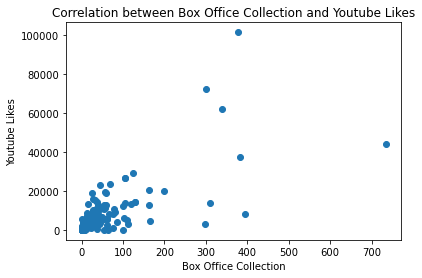

In [38]:
plt.scatter(df.BoxOfficeCollection, df.YoutubeLikes)
plt.xlabel("Box Office Collection")
plt.ylabel("Youtube Likes")
plt.title("Correlation between Box Office Collection and Youtube Likes")

# 10.Which genreof movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.

<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

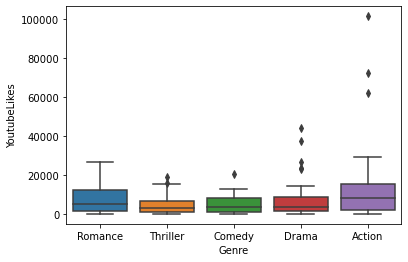

In [55]:
sns.boxplot(x = df.Genre, y = df.YoutubeLikes)

# 11.Which of the variables among Budget,BoxOfficeCollection,YoutubeView,YoutubeLikes,YoutubeDislikesare highly correlated? Note: Draw pair plot orheatmap.

In [40]:
df3 = df.copy()
df3 = df3.filter(["Genre","YoutubeLikes"])
df3.groupby('Genre')['YoutubeLikes'].sum()

Genre
Action      401873
Comedy      172250
Drama       279077
Romance     177241
Thriller    143312
Name: YoutubeLikes, dtype: int64

In [41]:
df.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000


<AxesSubplot:>

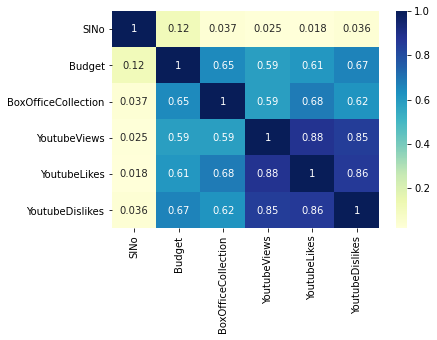

In [50]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# 12.During 2013−2015 period,highlight the genre of movies and theirbox office collection? Visualize with best fit graph.


In [43]:
df4 = df.copy()
for i in range (m):
    k = df4["Release Date"][i].split("-")[2]
    if(k != "13" or k != "14" or k != "15"):
        continue
    df4 = df4.drop(i)

df4

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.2
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.6
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.95
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb,1.0
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar,1.469231
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar,-0.625
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar,1.378


<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

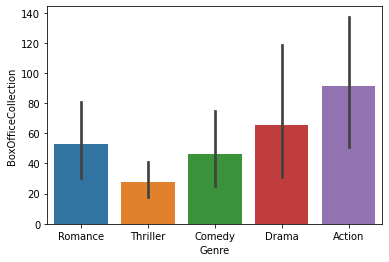

In [54]:
sns.barplot(x = df4.Genre, y = df4.BoxOfficeCollection)

# 13.VisualizetheBudget and Box office collection based on Genre.

Text(0.5, 1.0, 'Bar Chart')

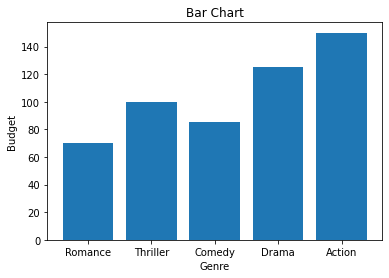

In [46]:
plt.bar(df.Genre, df.Budget)
plt.xlabel("Genre")
plt.ylabel("Budget")
plt.title("Bar Chart")

Text(0.5, 1.0, 'Bar Chart')

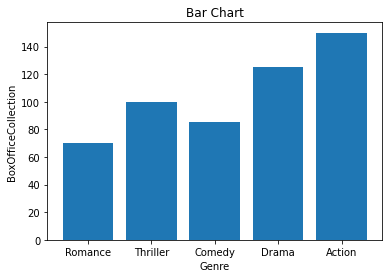

In [56]:
plt.bar(df.Genre, df.Budget)
plt.xlabel("Genre")
plt.ylabel("BoxOfficeCollection")
plt.title("Bar Chart")

<ipython-input-58-d047c7ffe5d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Release Year"][i] = k
<ipython-input-58-d047c7ffe5d4>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5 = df5.groupby('Release Year')['Budget', 'BoxOfficeCollection'].sum()


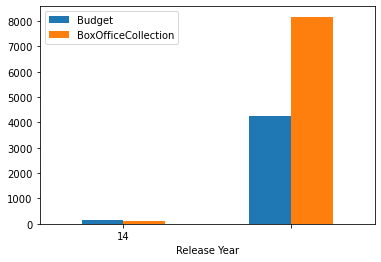

In [58]:
df5 = df.copy()
df5["Release Year"] = df.apply(lambda _: '', axis=1)
for i in range (m):
 k = int(df["Release Date"][i].split("-")[2])
df5["Release Year"][i] = k



df5 = df5.filter(["Release Year", "Budget", "BoxOfficeCollection"])
df5 = df5.groupby('Release Year')['Budget', 'BoxOfficeCollection'].sum()
df5


ax = df5.plot.bar(rot = 0)

# 15.During 2013−2015, Visualize the number of  Youtube views,Youtube likes released in every year. Also, visualize with best fit graph.

In [47]:
df4["Release Year"] = df.apply(lambda _: '', axis=1)
for i in range (m):
    k = df4["Release Date"][i].split("-")[2]
    df4["Release Year"][i] = k

df4

<ipython-input-47-351bb67ba036>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Release Year"][i] = k


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Release Month,ROI,Release Year
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,Apr,1.888889,14
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,Jan,0.2,13
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,Jul,-0.6,14
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,Jan,-0.95,13
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,Jul,-0.4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615,Feb,1.0,15
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513,Mar,1.469231,15
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807,Mar,-0.625,15
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762,Mar,1.378,15


In [48]:
g = df4["Release Year"].value_counts()
g

14    70
13    67
15    12
Name: Release Year, dtype: int64

In [ ]:
sns.barplot(x = df.Year.unique(), y = df5.YoutubeLikes)

In [ ]:
sns.barplot(x = df.Year.unique(), y = df5.YoutubeViews)